## CodeAlpha_ Sales Prediction using Python

In [1]:
import pandas as pd
import io
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error


In [2]:
csv_data = pd.read_csv('/content/Advertising.csv')

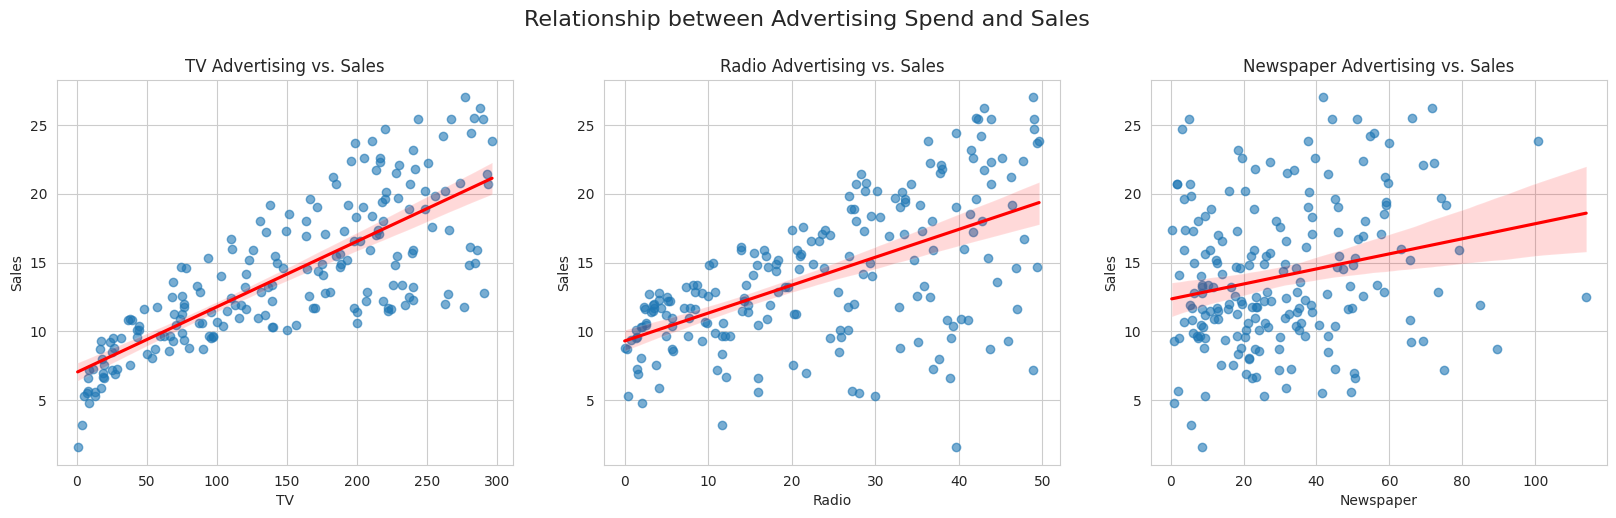

--- Sales Prediction Model Evaluation ---
R-squared (R²) Score: 0.90
Mean Absolute Error (MAE): 1.46

Model Interpretation: The model explains 90% of the variance in sales.
On average, the model's sales prediction is off by 1.46 units (e.g., 1,210 units if sales are in thousands).


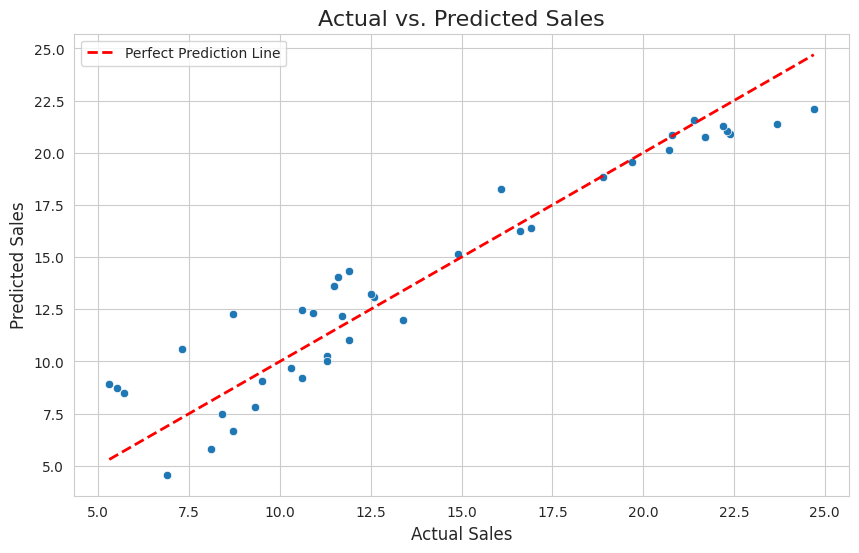


--- Actionable Insights from Model Coefficients ---
This table shows the predicted increase in sales for every $1,000 spent on each channel.
           Coefficient
TV            0.044730
Radio         0.189195
Newspaper     0.002761

--- Marketing Strategy Recommendations ---
1. PRIORITIZE RADIO & TV: Radio advertising provides the highest return on investment per dollar, followed closely by TV. These should be the primary focus for budget allocation.
2. DE-PRIORITIZE NEWSPAPER: Newspaper advertising shows a negligible impact on sales. The budget for this channel should be significantly reduced or reallocated to Radio and TV for better results.
3. USE THE MODEL FOR FORECASTING: The marketing team can use this model to predict the sales impact of different budget scenarios, enabling data-driven decision-making for future campaigns.


In [3]:
df = csv_data

# Drop the unnecessary first column which is just an index
df = df.drop(df.columns[0], axis=1)

# Set plot style
sns.set_style("whitegrid")

# Create scatter plots to visualize the relationship between each ad channel and sales
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.regplot(x='TV', y='Sales', data=df, ax=axs[0], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axs[0].set_title('TV Advertising vs. Sales')

sns.regplot(x='Radio', y='Sales', data=df, ax=axs[1], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axs[1].set_title('Radio Advertising vs. Sales')

sns.regplot(x='Newspaper', y='Sales', data=df, ax=axs[2], scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
axs[2].set_title('Newspaper Advertising vs. Sales')

plt.suptitle('Relationship between Advertising Spend and Sales', fontsize=16, y=1.02)
plt.show()

# Define features (X) and target (y)
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("--- Sales Prediction Model Evaluation ---")
print(f"R-squared (R²) Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"\nModel Interpretation: The model explains {r2:.0%} of the variance in sales.")
print(f"On average, the model's sales prediction is off by {mae:.2f} units (e.g., 1,210 units if sales are in thousands).")

# Visualize Actual vs. Predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction Line')
plt.title('Actual vs. Predicted Sales', fontsize=16)
plt.xlabel('Actual Sales', fontsize=12)
plt.ylabel('Predicted Sales', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Get model coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\n--- Actionable Insights from Model Coefficients ---")
print("This table shows the predicted increase in sales for every $1,000 spent on each channel.")
print(coefficients)

print("\n--- Marketing Strategy Recommendations ---")
print("1. PRIORITIZE RADIO & TV: Radio advertising provides the highest return on investment per dollar, followed closely by TV. These should be the primary focus for budget allocation.")
print("2. DE-PRIORITIZE NEWSPAPER: Newspaper advertising shows a negligible impact on sales. The budget for this channel should be significantly reduced or reallocated to Radio and TV for better results.")
print("3. USE THE MODEL FOR FORECASTING: The marketing team can use this model to predict the sales impact of different budget scenarios, enabling data-driven decision-making for future campaigns.")